# 【Midterm Project】University Students Monthly Expenses

- 第3組
- 成員: 𣛮孟辰, 曾千芸, 洪聖淮, 林羿葶, 郭俊傑

## Project Scenario / 專案情境：

### Background / 背景介紹

隨著生活成本的逐年提高，許多大學生面臨著預算管理的挑戰。本報告旨在分析大學生每月的支出模式，以了解主要的花費類別並探索不同因素（如性別、學年、居住類型等）對每月支出的影響。通過這些分析，我們可以幫助學生更好地理解自己的消費習慣，並尋找潛在的節省空間。

---

### Data / 資料

此資料集涵蓋了105位大學生的基本信息、生活習慣及每月支出數據，具體欄位包括年齡、性別、是否有兼職、是否吸菸等，並記錄了每月的總支出。我們將通過描述性統計、分組分析、生活習慣的影響分析、支出偏好結構、異常值和差異分析及相關性分析，深入探討資料中的支出模式。



In [1]:
!pip install numpy
!pip install numpy pandas matplotlib seaborn
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('University Students Monthly Expenses.csv')
print(data.head(10))
print("shape",data.shape)

    Gender  Age  Study_year  Living Scholarship Part_time_job Transporting  \
0  Female    21         2.0    Home          No            No           No   
1    Male    25         3.0  Hostel          No           Yes   Motorcycle   
2    Male    23         2.0    Home         Yes            No           No   
3    Male    19         3.0  Hostel          No            No   Motorcycle   
4  Female    19         2.0    Home          No            No   Motorcycle   
5    Male    22         3.0  Hostel          No           Yes          Car   
6  Female    21         2.0    Home         Yes            No           No   
7    Male    22         3.0  Hostel          No           Yes   Motorcycle   
8  Female    18         1.0    Home         Yes            No           No   
9    Male    19         1.0    Home          No            No           No   

  Smoking Drinks Games_&_Hobbies Cosmetics_&_Self-care Monthly_Subscription  \
0      No     No              No                   Yes        

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 105 non-null    object 
 1   Age                    105 non-null    int64  
 2   Study_year             101 non-null    float64
 3   Living                 103 non-null    object 
 4   Scholarship            105 non-null    object 
 5   Part_time_job          100 non-null    object 
 6   Transporting           91 non-null     object 
 7   Smoking                94 non-null     object 
 8   Drinks                 92 non-null     object 
 9   Games_&_Hobbies        105 non-null    object 
 10  Cosmetics_&_Self-care  92 non-null     object 
 11  Monthly_Subscription   96 non-null     object 
 12  Monthly_expenses_$     99 non-null     float64
dtypes: float64(2), int64(1), object(10)
memory usage: 10.8+ KB


## 資料整理(包含填補缺失值和變量分類)

In [4]:
# 填補4個Study_year缺失值 用學年的中位數來填補，保持數據的集中趨勢
data['Study_year'] = data['Study_year'].fillna(data['Study_year'].median())

# 填補2個值Living缺失值 類別型變量用最常見的值（眾數）來填補，這樣能夠保留多數人的選擇
data['Living'] = data['Living'].fillna(data['Living'].mode()[0])

# 填補14個值Transporting 缺失值 預設缺失值代表學生無交通工具，填補為 "No"
data['Transporting'] = data['Transporting'].fillna('No')

# 填補6個值Monthly_expenses_$ 缺失值 用中位數進行填補，以減少極端值對填補結果的影響
data['Monthly_expenses_$'] = data['Monthly_expenses_$'].fillna(data['Monthly_expenses_$'].median())

# 填補二元欄位的缺失值（例如 "Yes"/"No"）預設缺失值為 "No"
binary_columns = ['Part_time_job', 'Smoking', 'Drinks', 'Cosmetics_&_Self-care', 'Monthly_Subscription']
for col in binary_columns:
    data[col] = data[col].fillna('No')

In [5]:
# 變量分類
binary = ['Gender', 'Living', 'Scholarship', 'Part_time_job', 'Smoking', 'Drinks',
          'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription', 'Has_Vehicle']
# 二元變量（具有兩種可能值的變量）
ordinal = ['Study_year']  # 只剩下學年作為有序變量

# 將 'Transporting' 轉換為二元變量 'Has_Vehicle'
data['Has_Vehicle'] = data['Transporting'].apply(lambda x: 'Yes' if x in ['Car', 'Motorcycle'] else 'No')

# 將二元變量和有序變量進行編碼
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()  # 將類別型變量轉換為數值
data[binary] = oe.fit_transform(data[binary])
data[ordinal] = oe.fit_transform(data[ordinal])

# 查看轉換後的數據
print(data.head(10))


   Gender  Age  Study_year  Living  Scholarship  Part_time_job Transporting  \
0     0.0   21         1.0     0.0          0.0            0.0           No   
1     1.0   25         2.0     1.0          0.0            1.0   Motorcycle   
2     1.0   23         1.0     0.0          1.0            0.0           No   
3     1.0   19         2.0     1.0          0.0            0.0   Motorcycle   
4     0.0   19         1.0     0.0          0.0            0.0   Motorcycle   
5     1.0   22         2.0     1.0          0.0            1.0          Car   
6     0.0   21         1.0     0.0          1.0            0.0           No   
7     1.0   22         2.0     1.0          0.0            1.0   Motorcycle   
8     0.0   18         0.0     0.0          1.0            0.0           No   
9     1.0   19         0.0     0.0          0.0            0.0           No   

   Smoking  Drinks  Games_&_Hobbies  Cosmetics_&_Self-care  \
0      0.0     0.0              0.0                    1.0   
1     

In [6]:
data.info()
# 查看有序變量編碼後有多少種不同的值
for col in ordinal:
    unique_count = data[col].nunique()
    print(f"{col} 有 {unique_count} 種不同的值")
    # 查看 OrdinalEncoder 編碼後的類別
for i, col in enumerate(ordinal):
    print(f"{col} 的編碼類別順序: {oe.categories_[i]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 105 non-null    float64
 1   Age                    105 non-null    int64  
 2   Study_year             105 non-null    float64
 3   Living                 105 non-null    float64
 4   Scholarship            105 non-null    float64
 5   Part_time_job          105 non-null    float64
 6   Transporting           105 non-null    object 
 7   Smoking                105 non-null    float64
 8   Drinks                 105 non-null    float64
 9   Games_&_Hobbies        105 non-null    float64
 10  Cosmetics_&_Self-care  105 non-null    float64
 11  Monthly_Subscription   105 non-null    float64
 12  Monthly_expenses_$     105 non-null    float64
 13  Has_Vehicle            105 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 11.6+ KB

## 1. 基本描述性統計分析

總支出統計：計算「Monthly_expenses_$」的平均值、標準差、最小值和最大值，了解大學生平均的每月花費。

生活習慣與支出：統計每項生活習慣（吸菸、飲酒、娛樂、護理等）中選擇「Yes」的比例，理解大學生不同項目上的花費偏好。


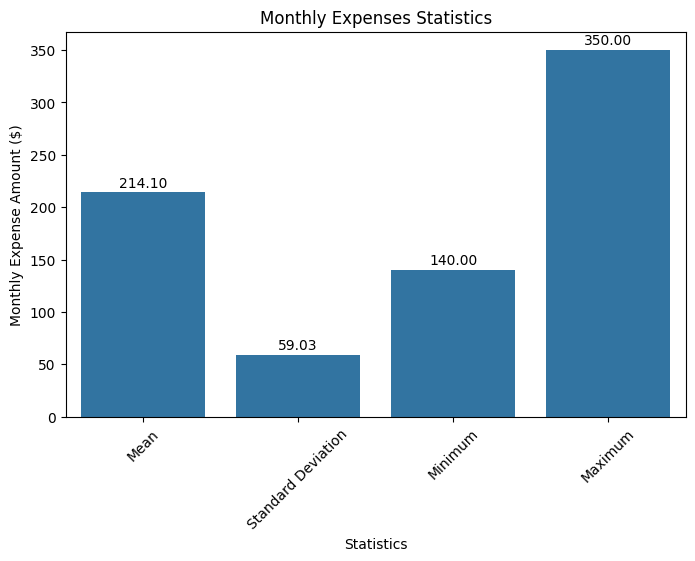

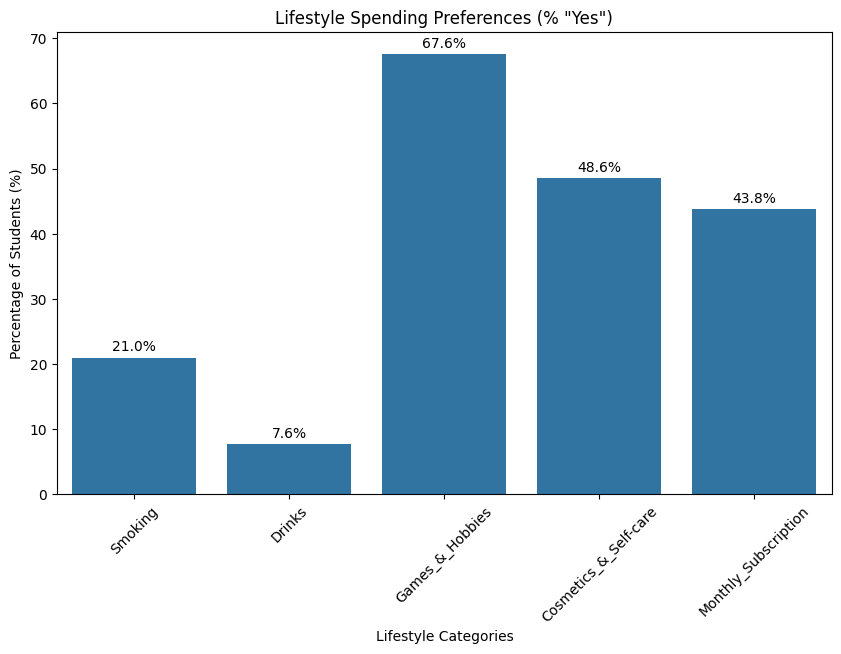

In [7]:
# 總支出統計的條形圖
plt.figure(figsize=(8, 5))
total_expense_values = [
    data['Monthly_expenses_$'].mean(),
    data['Monthly_expenses_$'].std(),
    data['Monthly_expenses_$'].min(),
    data['Monthly_expenses_$'].max()
]
expense_labels = ['Mean', 'Standard Deviation', 'Minimum', 'Maximum']
ax1 = sns.barplot(x=expense_labels, y=total_expense_values)
plt.title('Monthly Expenses Statistics')
plt.ylabel('Monthly Expense Amount ($)')
plt.xlabel('Statistics')
plt.xticks(rotation=45)
for i, value in enumerate(total_expense_values):
    ax1.text(i, value + 5, f'{value:.2f}', ha='center')

plt.show()

# 繪製生活習慣支出偏好（% 'Yes'）的條形圖
plt.figure(figsize=(10, 6))
lifestyle_columns = ['Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']
lifestyle_stats = data[lifestyle_columns].mean() * 100  # 計算 Yes 比例
ax2 = sns.barplot(x=lifestyle_stats.index, y=lifestyle_stats.values)
plt.title('Lifestyle Spending Preferences (% "Yes")')
plt.ylabel('Percentage of Students (%)')
plt.xlabel('Lifestyle Categories')
plt.xticks(rotation=45)
for i, value in enumerate(lifestyle_stats.values):
    ax2.text(i, value + 1, f'{value:.1f}%', ha='center')

plt.show()

### 1. Monthly Expenses Statistics（每月支出的總體統計條形圖）
觀察：平均月支出約為214美元，標準差約為61美元，最低支出為140美元，最高為350美元。
#### 結論：學生每月支出的差異相對較大，這可能與個人生活習慣、學年等因素有關。支出分佈範圍從140到350美元，顯示一些學生有相對較高的開銷。
### 2. Lifestyle Spending Preferences (% "Yes")（生活習慣支出偏好的百分比條形圖）
觀察：娛樂和嗜好（Games & Hobbies）支出比例最高，接近70%，其次是個人護理（Cosmetics & Self-care）和訂閱服務（Monthly Subscription）。
#### 結論：大多數學生在娛樂和個人護理上有較高的支出需求，這些可能是他們生活中優先考慮的支出類別。飲酒的比例最低，顯示此項支出需求相對較少。

## 2. 分組分析(性別、學年、居住類型、交通)



Gender-wise Monthly Expense Averages:
 Gender
0.0    212.641509
1.0    215.576923
Name: Monthly_expenses_$, dtype: float64

Study Year-wise Monthly Expense Averages:
 Study_year
0.0    196.363636
1.0    200.222222
2.0    217.142857
3.0    241.071429
Name: Monthly_expenses_$, dtype: float64

Living Type-wise Monthly Expense Averages:
 Living
0.0    215.217391
1.0    211.944444
Name: Monthly_expenses_$, dtype: float64

Vehicle Ownership-wise Monthly Expense Averages:
 Has_Vehicle
0.0    185.0
1.0    232.0
Name: Monthly_expenses_$, dtype: float64


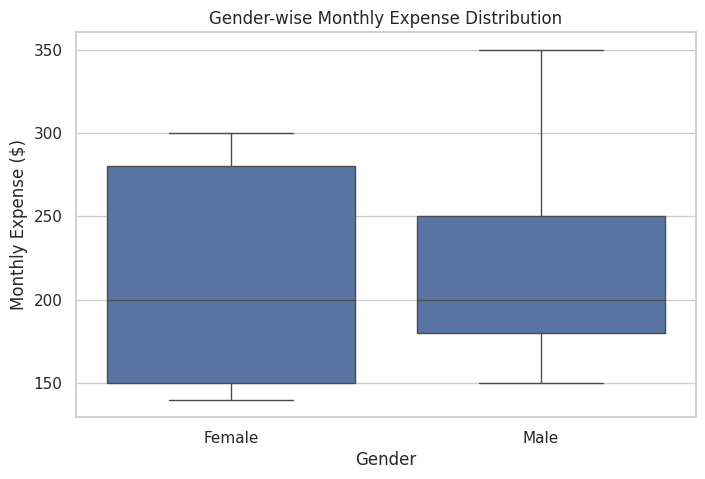

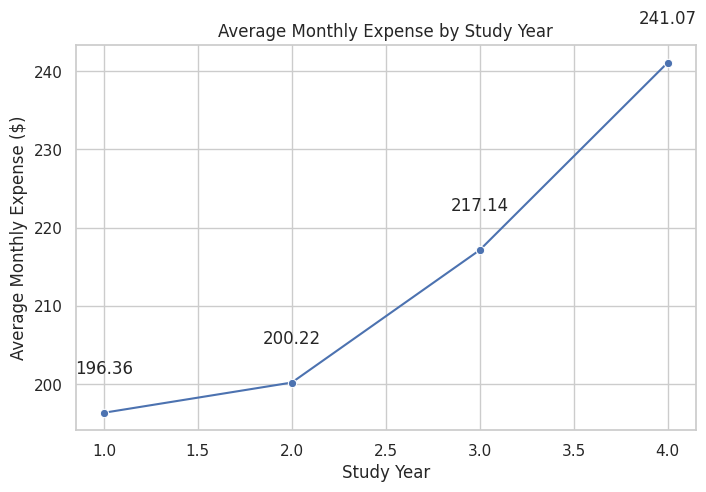

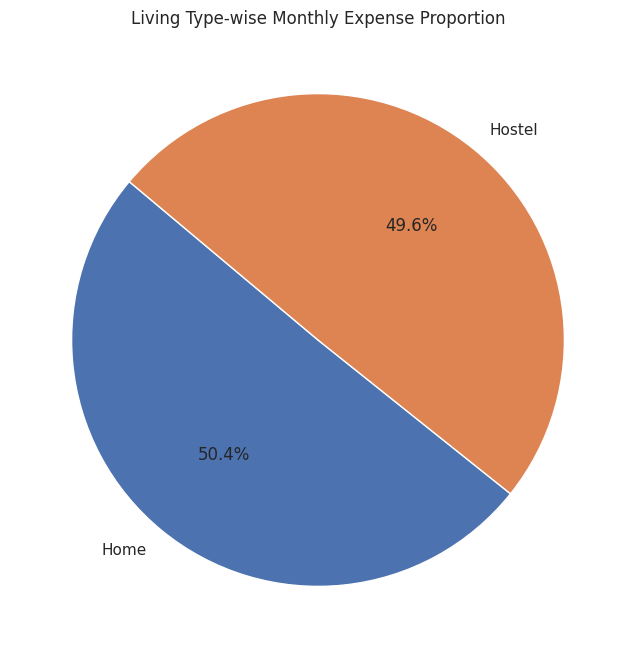

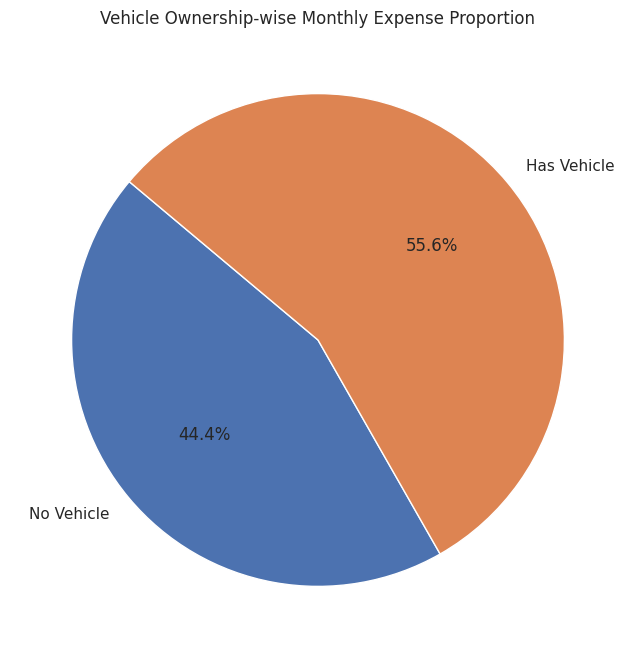

In [11]:
# 按性別分組，計算每月支出平均值
gender_expense_stats = data.groupby('Gender')['Monthly_expenses_$'].mean()
print("Gender-wise Monthly Expense Averages:\n", gender_expense_stats)

# 按學年分組，計算每月支出平均值
study_year_expense_stats = data.groupby('Study_year')['Monthly_expenses_$'].mean()
print("\nStudy Year-wise Monthly Expense Averages:\n", study_year_expense_stats)

# 按居住類型分組，計算每月支出平均值
living_expense_stats = data.groupby('Living')['Monthly_expenses_$'].mean()
print("\nLiving Type-wise Monthly Expense Averages:\n", living_expense_stats)

# 按有無車分組，計算每月支出平均值
vehicle_expense_stats = data.groupby('Has_Vehicle')['Monthly_expenses_$'].mean()
print("\nVehicle Ownership-wise Monthly Expense Averages:\n", vehicle_expense_stats)

sns.set(style="whitegrid")

# 性別分析 - 箱形圖
plt.figure(figsize=(8, 5))
gender_labels = ['Female', 'Male']
ax = sns.boxplot(x=data['Gender'].replace({0: 'Female', 1: 'Male'}), y=data['Monthly_expenses_$'])
plt.title('Gender-wise Monthly Expense Distribution')
plt.ylabel('Monthly Expense ($)')
plt.xlabel('Gender')
plt.show()

# 學年分析 - 折線圖，年級從 1 到 4
plt.figure(figsize=(8, 5))
study_year_labels = [1, 2, 3, 4]
ax = sns.lineplot(x=study_year_labels, y=study_year_expense_stats.values, marker='o')
plt.title('Average Monthly Expense by Study Year')
plt.ylabel('Average Monthly Expense ($)')
plt.xlabel('Study Year')
for i, value in enumerate(study_year_expense_stats.values):
    plt.text(study_year_labels[i], value + 5, f'{value:.2f}', ha='center')
plt.show()

# 居住類型分析 - 圓餅圖，顯示各類型的平均支出比例
plt.figure(figsize=(8, 8))
living_labels = ['Home', 'Hostel']
plt.pie(living_expense_stats, labels=living_labels, autopct='%1.1f%%', startangle=140)
plt.title('Living Type-wise Monthly Expense Proportion')
plt.show()

# 有無車分析 - 圓餅圖，顯示有無車的平均支出比例
plt.figure(figsize=(8, 8))
vehicle_labels = ['No Vehicle', 'Has Vehicle']
plt.pie(vehicle_expense_stats, labels=vehicle_labels, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Ownership-wise Monthly Expense Proportion')
plt.show()

### 1. Gender-wise Monthly Expense Distribution（性別分佈的每月支出箱形圖）
觀察：女生的每月支出範圍較廣，平均值較高，並且上四分位數顯示有較多的高支出。男性的支出集中度更高，範圍較窄，且整體支出偏低。
#### 結論：女生的平均月支出比男生高，且支出範圍更廣。這可能是由於女生在某些生活習慣或需求上的花費高於男生。
### 2. Average Monthly Expense by Study Year（按學年分組的平均每月支出折線圖）
觀察：隨著學年的增加，學生的平均每月支出逐漸增高，從一年級的約196美元上升到四年級的241美元。
#### 結論：高年級的學生每月平均支出更高，這可能是由於年長的學生生活習慣或活動的增多，或是對不同生活品質的需求增加。
### 3. Living Type-wise Monthly Expense Proportion（居住類型分佈的每月支出比例圓餅圖）
觀察：住在家裡（Home）的學生支出占比約為50.4%，而住在宿舍（Hostel）的學生支出占比為49.6%。
#### 結論：居住類型對平均月支出的影響較小，住家和宿舍的學生支出比例幾乎相等。這可能意味著居住類型並非主要的支出決定因素。
### 4. Vehicle Ownership-wise Monthly Expense Proportion（有無車的平均支出比例圓餅圖）
觀察：沒有車輛的學生佔44.4%，他們的支出較少。
#### 結論：無車群體的學生，無需負擔額外的交通工具相關成本，使得他們的支出相對更低。


## 3. 生活習慣的影響分析
兼職與獎學金的影響：分析是否有兼職和是否有獎學金對月支出的影響。

吸菸、飲酒對總開銷的影響：比較吸菸、飲酒的學生與不吸菸、不飲酒的學生的總支出，以了解這些習慣是否與較高的支出有關。

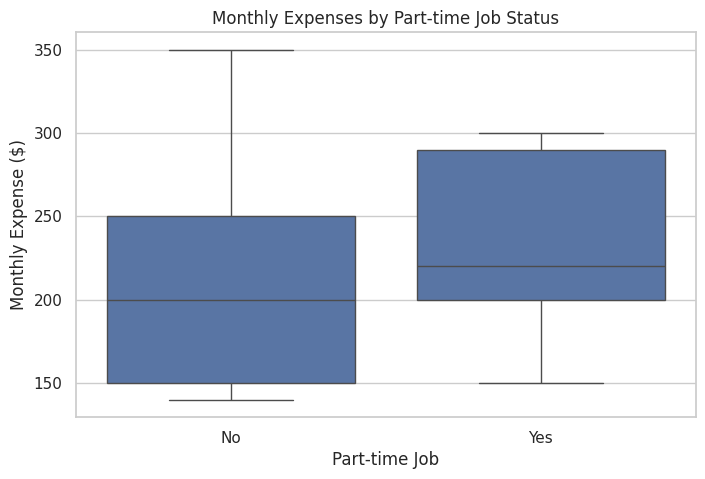

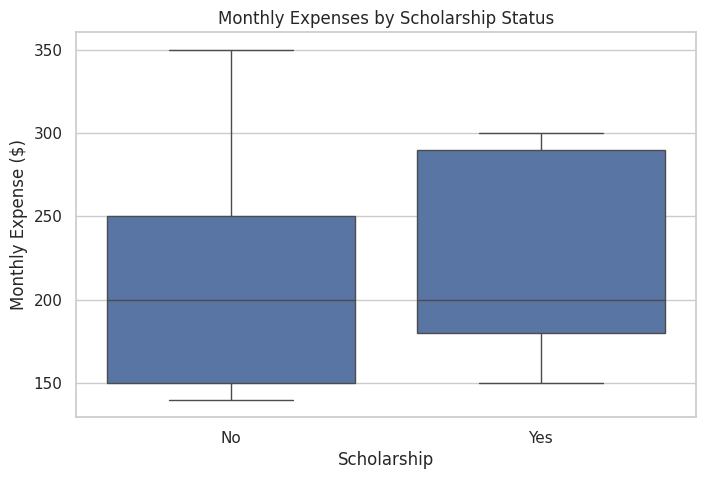

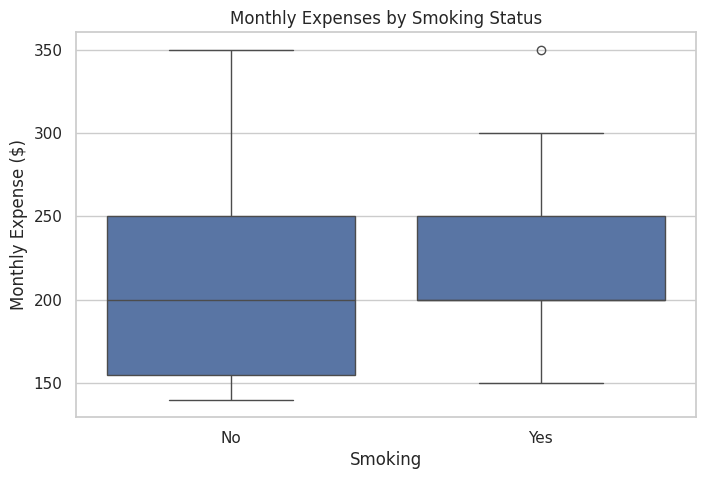

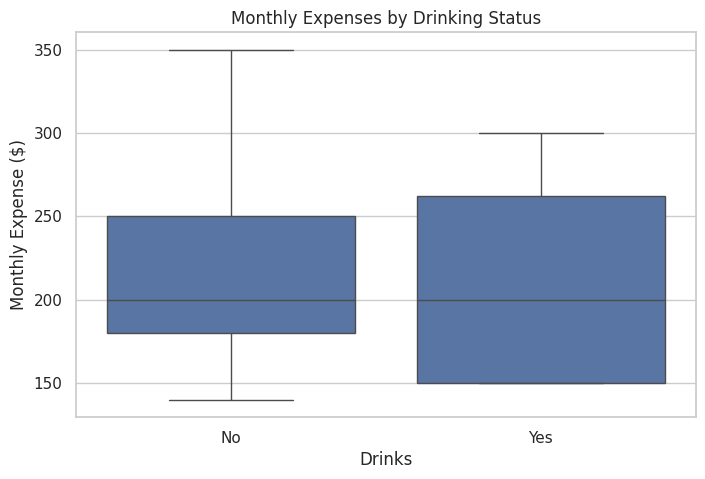

In [9]:
# 兼職對月支出的影響
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Part_time_job'].replace({0: 'No', 1: 'Yes'}), y=data['Monthly_expenses_$'])
plt.title('Monthly Expenses by Part-time Job Status')
plt.ylabel('Monthly Expense ($)')
plt.xlabel('Part-time Job')
plt.show()

# 獎學金對月支出的影響
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Scholarship'].replace({0: 'No', 1: 'Yes'}), y=data['Monthly_expenses_$'])
plt.title('Monthly Expenses by Scholarship Status')
plt.ylabel('Monthly Expense ($)')
plt.xlabel('Scholarship')
plt.show()

# 吸菸對月支出的影響
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Smoking'].replace({0: 'No', 1: 'Yes'}), y=data['Monthly_expenses_$'])
plt.title('Monthly Expenses by Smoking Status')
plt.ylabel('Monthly Expense ($)')
plt.xlabel('Smoking')
plt.show()

# 飲酒對月支出的影響
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Drinks'].replace({0: 'No', 1: 'Yes'}), y=data['Monthly_expenses_$'])
plt.title('Monthly Expenses by Drinking Status')
plt.ylabel('Monthly Expense ($)')
plt.xlabel('Drinks')
plt.show()

### 1. Monthly Expenses by Part-time Job Status（兼職狀態對每月支出的影響）
觀察：沒有兼職工作的學生在每月支出上的範圍較廣，包含一些較低的支出。相比之下，有兼職的學生支出集中在較高範圍，支出變異較小。
#### 結論：有兼職工作的學生平均支出略高，這可能是因為兼職收入增加了他們的可支配支出。兼職收入可能為學生提供了更多的花費靈活性。
### 2. Monthly Expenses by Scholarship Status（獎學金狀態對每月支出的影響）
觀察：有獎學金的學生在支出上的分佈範圍比無獎學金的學生集中，且支出較高。無獎學金的學生中，支出下限較低。
#### 結論：有獎學金的學生支出集中在更高的範圍，這可能表明獎學金資助使得這些學生在經濟上較寬裕，進而增加了他們的支出能力。
### 3. Monthly Expenses by Smoking Status（吸菸狀態對每月支出的影響）
觀察：吸菸和不吸菸學生的支出中位數相似，但吸菸學生中存在一些較高的支出數據（可能為異常值）。
#### 結論：吸菸對總體支出的影響較小，但一些吸菸的學生可能因吸菸習慣導致更高的生活成本。異常值可能代表吸菸花費較多的情況。
### 4. Monthly Expenses by Drinking Status（飲酒狀態對每月支出的影響）
觀察：飲酒學生的支出範圍比不飲酒的學生更集中，但在支出中位數上兩者沒有顯著差異。飲酒的學生支出範圍略偏高。
#### 結論：飲酒的學生在支出上比不飲酒的學生稍高，但影響並不顯著。飲酒可能只是支出的一個小部分，對整體支出影響有限。
### 綜合分析
這些圖表顯示了不同生活習慣和經濟支持（兼職、獎學金）對月支出的影響。兼職和獎學金是影響支出水平的主要因素，而吸菸和飲酒對支出的影響較小。這些結果反映了經濟資源的可得性如何改變學生的消費模式。

## 4. 支出類別的偏好比例


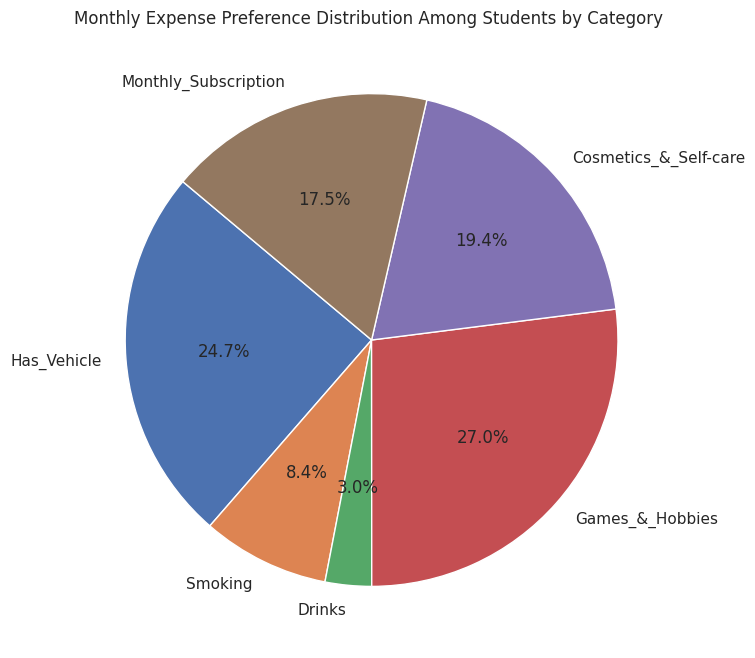

<Figure size 1000x600 with 0 Axes>

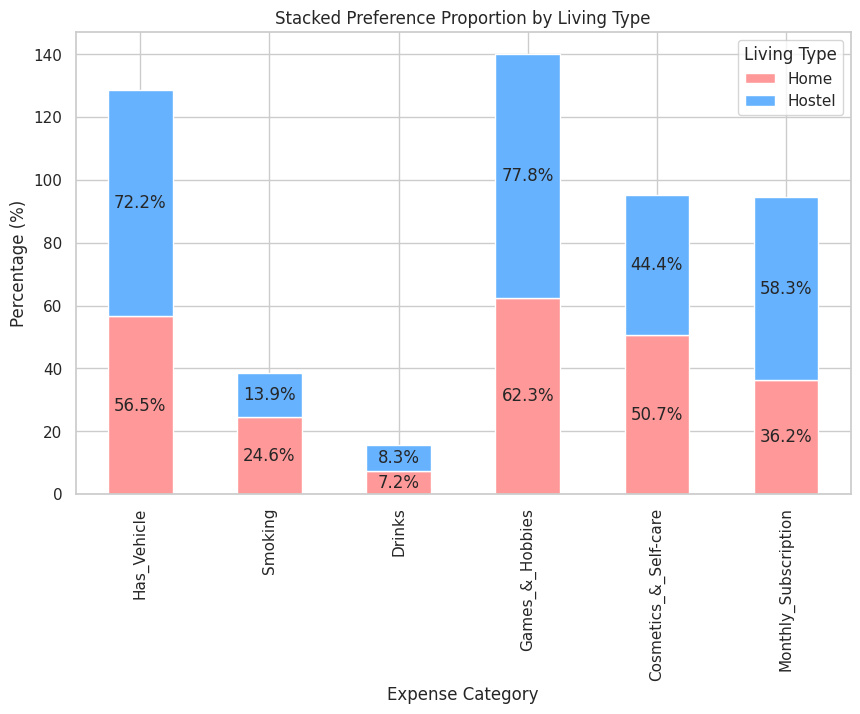

<Figure size 1000x600 with 0 Axes>

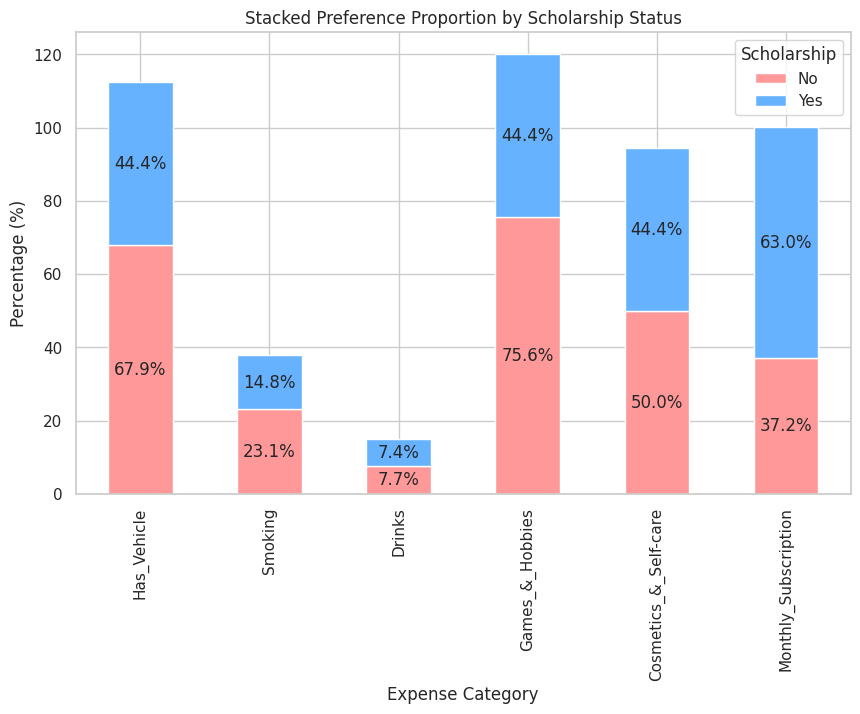

<Figure size 1000x600 with 0 Axes>

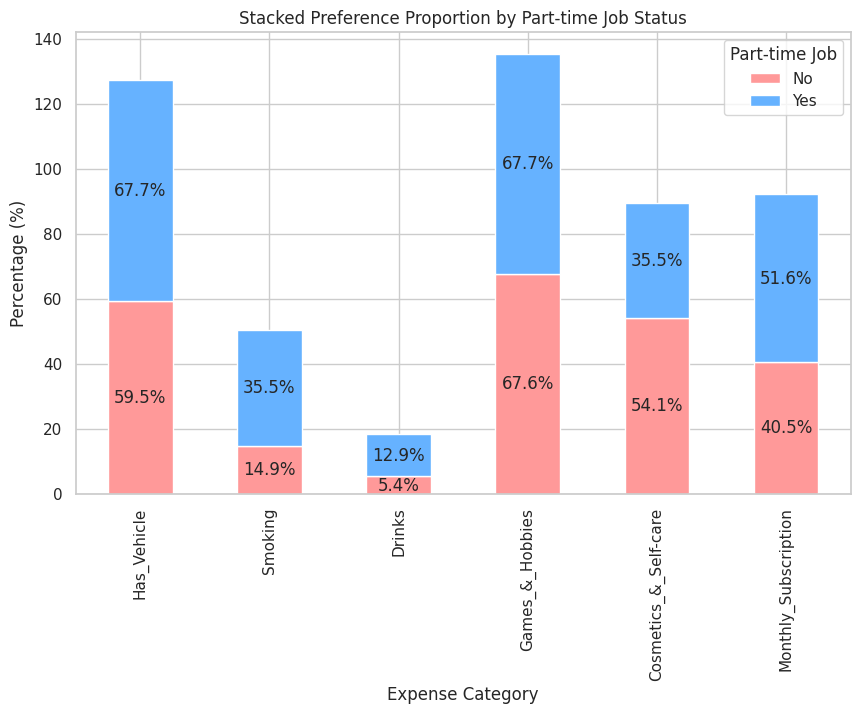

In [27]:
# 定義支出類別欄位
expense_columns_binary = ['Has_Vehicle', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']

# 計算這些二元選項中，選擇「Yes」的比例，作為平均支出偏好指標
average_expenses_binary = data[expense_columns_binary].mean() * 100  # 百分比

# 繪製圓餅圖 - 各類別的支出偏好比例
plt.figure(figsize=(8, 8))
plt.pie(average_expenses_binary, labels=average_expenses_binary.index, autopct='%1.1f%%', startangle=140)
plt.title('Monthly Expense Preference Distribution Among Students by Category ')
plt.show()
# 修改群組名稱，將 1 和 0 替換為具體標籤
data['Living'] = data['Living'].replace({1: 'Hostel', 0: 'Home'})
data['Scholarship'] = data['Scholarship'].replace({1: 'Yes', 0: 'No'})
data['Part_time_job'] = data['Part_time_job'].replace({1: 'Yes', 0: 'No'})

# 定義支出類別欄位
expense_columns_binary = ['Has_Vehicle', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']

# 計算不同群組（Living、Scholarship、Part_time_job）的支出偏好比例
living_pref_stats = data.groupby('Living')[expense_columns_binary].mean() * 100
scholarship_pref_stats = data.groupby('Scholarship')[expense_columns_binary].mean() * 100
part_time_job_pref_stats = data.groupby('Part_time_job')[expense_columns_binary].mean() * 100

# 堆疊柱狀圖 - 分組 Living
plt.figure(figsize=(10, 6))
ax1 = living_pref_stats.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999','#66B2FF'])
plt.title('Stacked Preference Proportion by Living Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Expense Category')
plt.legend(title='Living Type')
# 添加數值標籤
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%.1f%%')
plt.show()

# 堆疊柱狀圖 - 分組 Scholarship
plt.figure(figsize=(10, 6))
ax2 = scholarship_pref_stats.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999','#66B2FF'])
plt.title('Stacked Preference Proportion by Scholarship Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Expense Category')
plt.legend(title='Scholarship')
# 添加數值標籤
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fmt='%.1f%%')
plt.show()

# 堆疊柱狀圖 - 分組 Part_time_job
plt.figure(figsize=(10, 6))
ax3 = part_time_job_pref_stats.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999','#66B2FF'])
plt.title('Stacked Preference Proportion by Part-time Job Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Expense Category')
plt.legend(title='Part-time Job')
# 添加數值標籤
for container in ax3.containers:
    ax3.bar_label(container, label_type='center', fmt='%.1f%%')
plt.show()

#### 居住類型 (Living Type)：

有無交通工具：宿舍學生中有車輛的比例較高（72.2%），相比之下住在家裡的學生中只有 56.5% 擁有車輛。
娛樂偏好：住在宿舍的學生更偏向於在「娛樂與愛好」方面的花費（77.8%），而住家學生的比例相對較低（62.3%）。
月度訂閱：宿舍學生在月度訂閱上的支出比例高於住家學生（58.3% vs. 36.2%）。
#### 獎學金狀況 (Scholarship Status)：

有無交通工具：獲得獎學金的學生中有車輛的比例為 44.4%，相比之下未獲得獎學金的學生中此比例較高（67.9%）。
娛樂偏好：未獲得獎學金的學生在「娛樂與愛好」方面的支出偏好較高（75.6%），顯示出無獎學金的學生可能有更多的非必要支出。
月度訂閱：獲得獎學金的學生在月度訂閱上的偏好更高（63.0%），而無獎學金學生的比例為 37.2%。
#### 兼職狀況 (Part-time Job Status)：

有無交通工具：有兼職的學生中有車輛的比例較高（67.7%），而無兼職的學生中此比例為 59.5%。
吸菸與飲酒：有兼職的學生在吸菸（35.5%）和飲酒（12.9%）方面的比例顯著高於無兼職的學生，顯示出有兼職的學生可能更傾向於消費娛樂類支出。
月度訂閱：有兼職的學生在月度訂閱上的支出比例較高（51.6%），而無兼職的學生的比例為 40.5%。
#### 整體觀察

住在宿舍的學生更偏向娛樂和訂閱支出，而住家學生的支出更趨向於穩定。
獲得獎學金的學生在非必要支出方面（如娛樂）較為保守，而無獎學金的學生可能會在這些項目上有更高比例的支出。
有兼職的學生在交通、吸菸、飲酒方面的支出更高，顯示出這部分學生可能更偏向於多樣化消費。

## 5. 相關性分析
觀察各變量之間的相互關聯性，以揭示其中可能的模式和趨勢。

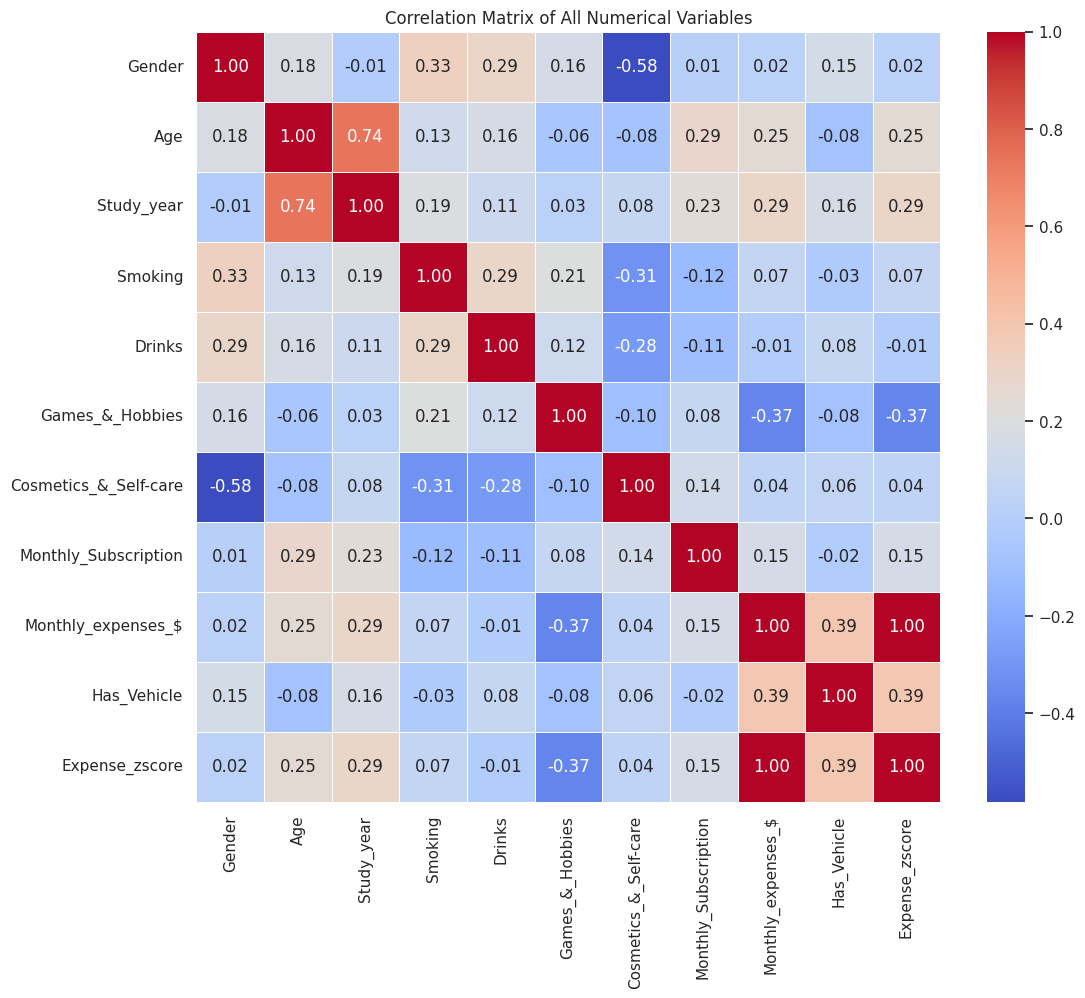

In [30]:

# 選擇數值型欄位以計算相關性矩陣（排除 Transporting）
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# 繪製相關性矩陣的熱力圖
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Numerical Variables')
plt.show()


### 年齡與學年：
年齡與學年（Age 和 Study_year）之間具有較高的正相關性（相關係數為 0.74）。這是預期的，因為隨著學生年級的增長，他們的年齡也通常會增大。
### 年齡與每月支出：

年齡（Age）和每月支出（Monthly_expenses_$）之間有一定的正相關性（相關係數為 0.25）。這可能表明隨著年齡增長，學生的每月支出有可能增加，但相關性不是非常強。
### 有無交通工具與每月支出：

擁有交通工具（Has_Vehicle）與每月支出之間的相關係數為 0.39，這意味著擁有交通工具的學生可能會有較高的每月支出。這可能是因為有車或摩托車的學生需要負擔額外的交通和維護費用。
### 遊戲與嗜好與每月支出：

Games_&_Hobbies 與每月支出之間存在一定的負相關性（-0.37）。這表明參與遊戲或嗜好支出較少的學生可能每月總支出較高，這可能與其他高支出項目相衝突。
### 性別與護理支出：

性別（Gender）和護理支出（Cosmetics_&_Self-care）之間有一個顯著的負相關（-0.58）。這可能暗示了性別在護理和個人保養的支出上有所差異（例如，女性可能花費更多）。
### 學年與每月支出：

學年（Study_year）和每月支出之間也有一些正相關（0.29）。隨著學生年級的增長，他們的支出可能也會增加，這可能是因為更高年級的學生需要更多的生活或學習支出。
### 各項支出偏好之間的相關性：

吸菸（Smoking）與飲酒（Drinks）之間有一定的正相關（0.29）。這表明有吸菸習慣的學生可能更容易有飲酒習慣，或這兩者之間可能存在一些聯繫。

## 6. 異常值和差異分析
極端支出分析：標記並分析支出極高或極低的數據點，找出其原因（如特定類型學生或特定習慣可能造成的高支出）。

支出差異分析：比較各項支出在不同學生群體之間的標準差或變異系數，以了解哪些項目支出差異最大。

In [32]:
from scipy.stats import zscore
# 計算 Z-score
data['Expense_zscore'] = (data['Monthly_expenses_$'] - data['Monthly_expenses_$'].mean()) / data['Monthly_expenses_$'].std()

# 選出極端支出數據
extreme_expenses = data[(data['Expense_zscore'] > 2) | (data['Expense_zscore'] < -2)]

# 顯示極端支出的數據點
print("Extreme Expenses:")
print(extreme_expenses[['Age', 'Study_year', 'Living', 'Monthly_expenses_$', 'Expense_zscore']])
# 計算各項支出的標準差
std_dev_expenses = data[['Has_Vehicle', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']].std()

# 計算各項支出的變異係數
mean_expenses = data[['Has_Vehicle', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']].mean()
cv_expenses = std_dev_expenses / mean_expenses

# 顯示標準差和變異係數
print("Standard Deviation of Each Expense Category:")
print(std_dev_expenses)
print("\nCoefficient of Variation (CV) for Each Expense Category:")
print(cv_expenses)


Extreme Expenses:
    Age  Study_year Living  Monthly_expenses_$  Expense_zscore
10   22         2.0   Home               350.0        2.302469
32   23         3.0   Home               350.0        2.302469
41   22         2.0   Home               350.0        2.302469
67   22         2.0   Home               350.0        2.302469
85   22         2.0   Home               350.0        2.302469
Standard Deviation of Each Expense Category:
Has_Vehicle              0.487950
Smoking                  0.408921
Drinks                   0.266575
Games_&_Hobbies          0.470173
Cosmetics_&_Self-care    0.502193
Monthly_Subscription     0.498533
dtype: float64

Coefficient of Variation (CV) for Each Expense Category:
Has_Vehicle              0.788227
Smoking                  1.951667
Drinks                   3.498798
Games_&_Hobbies          0.695326
Cosmetics_&_Self-care    1.033927
Monthly_Subscription     1.137955
dtype: float64


極端支出主要集中在居住在家的二三年級學生，這可能反映出生活條件或個人消費習慣的影響。

標準差分析：Cosmetics & Self-care 和 Monthly Subscription 的標準差較高，這表明這些項目在學生群體間的支出差異較大。
變異系數（CV）分析：
Drinks 的變異系數最高，表明不同學生在飲酒上的支出差異最大。可能一些學生完全不飲酒，而另一些學生偶爾飲酒，導致支出差異顯著。

差異較大的支出項目：Drinks、Smoking 和 Monthly_Subscription 表現出最大的支出差異，表明在這些項目上的消費高度依賴於個人偏好。
差異較小的支出項目：擁有交通工具 (Has_Vehicle) 和娛樂 (Games_&_Hobbies) 的支出模式相對穩定，學生之間的消費水平較為一致。

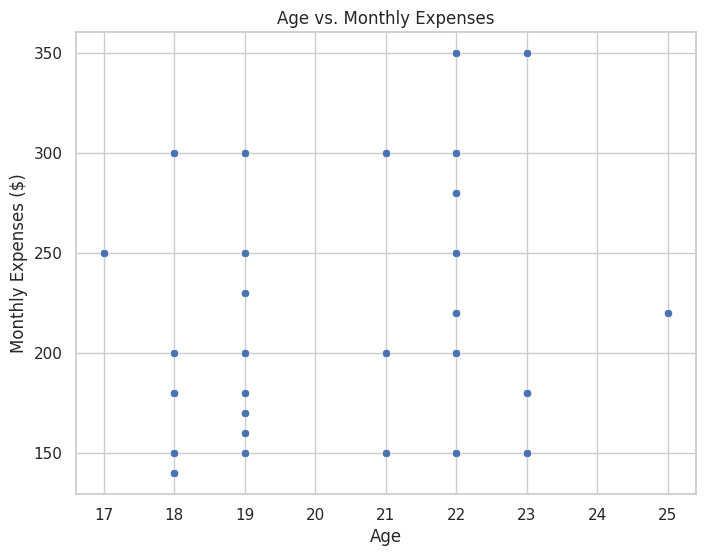

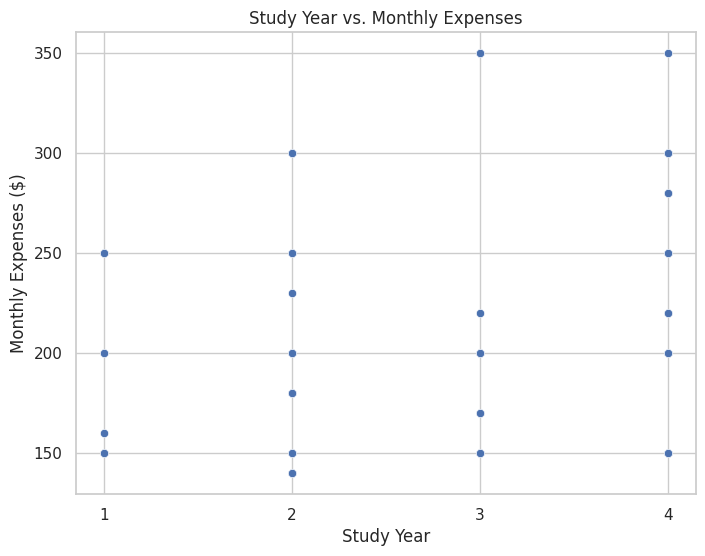

In [36]:
# 繪製「年齡」與「每月支出」的散佈圖
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Monthly_expenses_$')
plt.title('Age vs. Monthly Expenses')
plt.xlabel('Age')
plt.ylabel('Monthly Expenses ($)')
plt.show()

# 繪製「學年」與「每月支出」的散佈圖
plt.figure(figsize=(8, 6))
data['Study_year'] = data['Study_year'] + 1
sns.scatterplot(data=data, x='Study_year', y='Monthly_expenses_$')
plt.title('Study Year vs. Monthly Expenses')
plt.xlabel('Study Year')
plt.ylabel('Monthly Expenses ($)')
plt.xticks([1, 2, 3, 4])  # 將學年標為 1, 2, 3, 4
plt.show()


### 1. Age vs. Monthly Expenses（年齡與每月支出）
觀察：沒有明顯的線性關係。無論年齡如何，支出主要集中在 $150 至 $350 之間，並沒有隨著年齡增長而顯著增加或減少。
解釋：這表明大學生的支出不一定受年齡影響，而可能更多地受到其他因素。
### 2. Study Year vs. Monthly Expenses（學年與每月支出）
觀察：支出在各學年之間分佈相對均勻，無顯著變化。
解釋：學年對支出影響不大，這可能是因為無論學年如何，基本的生活費用如住宿、食物、學習資源等對所有學生來說都是必要的。


# 結論
### 1. 平均支出統計
支出分布較為分散，顯示出不同學生群體之間的顯著支出差異。
### 2. 支出偏好與類別
遊戲與興趣：在所有支出類別中支出比例最高(27%)，顯示出大部分學生願意在娛樂上投入較多資金。
美容與自我保養：占比為 19.4%，反映出許多學生對自我形象的重視程度較高。
交通工具：擁有交通工具的學生比例達到 24.7%，顯示一些學生需要依賴交通工具來滿足日常需求。
### 3. 分組分析
性別：
女性學生的支出中位數和平均支出均高於男性，並且支出範圍更廣。這可能與女性在美容、興趣愛好等方面的消費偏好更為顯著有關。
學年：
學生的支出隨著學年遞增。高年級學生可能面臨更多的生活支出需求，例如實習、就業準備等。
居住類型：
住在宿舍的學生擁有交通工具的比例更高，達到 72.2%，而住在家中的學生僅有 56.5% 擁有交通工具。這可能反映出住校學生需要更靈活的交通方式來滿足校內外活動需求。
獎學金：
擁有獎學金的學生在「遊戲與興趣」和「美容保養」的支出偏好上更高，這可能是因為獲得資助的學生有更多可支配收入投入在娛樂和自我提升方面。例如，有獎學金的學生中 63% 訂閱了月服務，而無獎學金的學生僅 37.2% 訂閱月服務。
兼職工作：
有兼職工作的學生在「遊戲與興趣」和「月訂閱」上的支出偏好更高，例如有兼職的學生中 51.6% 訂閱了月服務，而無兼職的學生僅有 40.5% 訂閱。這反映了有額外收入的學生對於娛樂性支出更為積極。
### 4. 相關性分析
年齡與學年之間具有強正相關性（相關係數為 0.74），這符合正常的年齡增長模式。
擁有交通工具與月支出之間有輕微正相關（相關係數為 0.39），顯示擁有交通工具的學生每月支出較高，可能是因為交通工具會帶來額外的燃油、維護等開銷。
「遊戲與興趣」支出與「每月總支出」呈現中等負相關（-0.37），表明部分學生在該類別支出較多的情況下，其他項目可能會有所縮減，這可能是預算分配的結果。
### 5. 異常值與支出差異
極端支出點：在支出最高（350 美元）的學生群體中，年齡集中在22歲左右，且住在家中。這些學生的高支出可能與特定愛好或生活方式有關，特別是其中有部分學生在遊戲、興趣和自我保養方面有較高的支出。
支出變異性：
飲酒和吸煙的變異系數最高（飲酒為 3.5，吸煙為 1.95），顯示這兩項支出在學生間差異極大，部分學生選擇完全不參與，而少數學生則有相對高的消費。
交通工具和月訂閱服務的標準差分別為 0.49 和 0.50，顯示在這些類別中，學生支出的穩定性較高，不同學生之間的差異相對較小。
# 總結建議
基於這些發現，學校可以考慮提供以下支持措施：
財務管理建議：針對高支出學生和高年級學生提供財務管理建議，幫助他們更好地分配每月支出。
交通支持：由於交通支出對部分學生構成負擔，學校可以考慮提供更多的校內交通支持或優惠措施，特別是針對住校的學生。
健康倡導：由於飲酒和吸煙的變異性大，學校可以提供健康倡導活動，幫助學生認識健康生活方式的重要性。


